In [1]:
"""
Created on Friday 12th March 2021

@author: Aditya Asopa, Bhalla Lab, NCBS

"""
## Import libraries
import sys
import os
import EIDynamics
import imp
import pandas as pd
import pickle
from plotMaker import plotMaker

In [86]:
datafile = os.path.realpath('C:\\Users\\adity\\OneDrive\\NCBS\\Lab\\Projects\\EI_Dynamics\\Data\\21-04-16_G294\\cell1\\2021_04_16_0007_rec.abf')
print(datafile)

C:\Users\adity\OneDrive\NCBS\Lab\Projects\EI_Dynamics\Data\21-04-16_G294\cell1\2021_04_16_0007_rec.abf


In [87]:
#Get the path
# datafile = os.path.realpath(sys.argv[1])
exptDir = os.path.dirname(datafile)
exptFile = os.path.basename(datafile)
fileID = exptFile.split('_rec')[0]
epFile = exptDir + "\\" + fileID + "_ExperimentParameters.py"
epFile = os.path.abspath(epFile)

print(epFile)

C:\Users\adity\OneDrive\NCBS\Lab\Projects\EI_Dynamics\Data\21-04-16_G294\cell1\2021_04_16_0007_ExperimentParameters.py


In [88]:
# Import Experiment Variables
try:
    print ("Looking for experiment parameters locally")
    eP = imp.load_source('ExptParams',epFile)
    print('Local parameters loaded')
except:
    print ("No special instructions, using default variables.")
    try:
        import ExperimentParameters_Default as eP
    except:
        print ("No analysis variable found!")

Looking for experiment parameters locally
Local parameters loaded


In [89]:
# importing stimulation coordinates
try:
    coordfile = exptDir + "\\" + fileID + "_coords.txt"
    os.path.isfile(coordfile)
    print('Loading local coord file')  
except:
    print('No coord file found, probably there isn\'t one')
    coordfile = ''

Loading local coord file


In [90]:
# Recording cell data and analyses
try:
    cellFile = exptDir + "\\" + "cell.pkl"    
    print('Loading local cell data from {}'.format(cellFile))
    cell.response = pd.read_pickle(cellFile)
except:
    print('Local cell data not found, creating new cell')
    cell = EIDynamics.Neuron(eP)

Loading local cell data from C:\Users\adity\OneDrive\NCBS\Lab\Projects\EI_Dynamics\Data\21-04-16_G294\cell1\cell.pkl


In [91]:
cell.createExperiment(datafile=datafile,coordfile=coordfile,exptParams=eP)

Loading ABF file
Datafile has 24 sweeps in 5 channels: 
 Ch0: Cell, 
 Ch1: FrameTTL, 
 Ch2: Photodiode, 
 Time: Time Axis, 
 cmd: Ch0 Command Signal


In [92]:
cell.experiment

{'50Hz': <EIDynamics.Experiment at 0x21bbb15eb08>,
 '20Hz': <EIDynamics.Experiment at 0x21bb58c62c8>,
 '30Hz': <EIDynamics.Experiment at 0x21bbb0d28c8>,
 '40Hz': <EIDynamics.Experiment at 0x21bb55950c8>}

In [93]:
len(cell.response)

192

In [94]:
resp = cell.response

In [95]:
resp.sample(10)

,Sweep,Repeat,Pattern,numSquares,Coords,Intensity,pulseWidth,StimFreq,EI,IR,...,10,11,12,13,14,15,16,firstPulseTime,AP,PeakResponse
17,17,3,A,5,"[197, 255, 347, 401, 439]",100,5,50,I,340.464462,...,17.80,9.80,3.40,7.10,2.85,5.15,13.00,9.10,False,52.706905
15,15,2,G,15,"[101, 109, 117, 147, 155, 197, 305, 309, 339, ...",100,5,50,E,173.622787,...,7.70,8.55,8.50,7.55,11.55,9.00,13.75,9.90,False,-60.877075
2,2,1,B,5,"[201, 293, 351, 355, 443]",100,5,20,I,371.170014,...,20.05,3.65,23.65,43.35,6.95,38.35,29.70,6.25,False,21.046139
11,11,2,C,5,"[205, 251, 297, 389, 447]",100,5,30,E,163.499920,...,11.90,13.55,11.80,6.75,14.20,18.95,15.25,12.10,False,-50.722656
9,9,2,A,5,"[197, 255, 347, 401, 439]",100,5,20,E,229.672027,...,6.10,38.65,21.05,34.15,45.35,25.25,48.95,33.90,False,-17.291855
8,8,1,H,15,"[151, 163, 197, 201, 209, 213, 259, 301, 339, ...",100,5,20,I,353.701869,...,9.75,11.20,16.75,0.20,16.50,44.20,20.35,9.65,False,320.870331
15,15,2,G,15,"[101, 109, 117, 147, 155, 197, 305, 309, 339, ...",100,5,40,I,293.994183,...,11.35,0.05,0.25,12.90,10.50,0.55,22.65,9.25,False,293.204315
16,16,2,H,15,"[151, 163, 197, 201, 209, 213, 259, 301, 339, ...",100,5,20,I,331.750601,...,9.40,11.25,11.15,22.50,24.65,17.60,17.20,10.90,False,367.626923
7,7,1,G,15,"[101, 109, 117, 147, 155, 197, 305, 309, 339, ...",100,5,50,I,289.354970,...,9.50,9.65,9.90,3.15,0.05,11.85,10.60,8.65,False,294.970673
9,9,2,A,5,"[197, 255, 347, 401, 439]",100,5,20,I,349.685746,...,42.75,3.20,32.45,10.60,44.75,7.45,16.90,3.00,False,29.918209


In [96]:
with open(cellFile,"wb") as f:
    pickle.dump(resp, f)

# Plots
plt.figure()
plotMaker(cellFile,ploty="peakTime",plotby="Pattern")

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

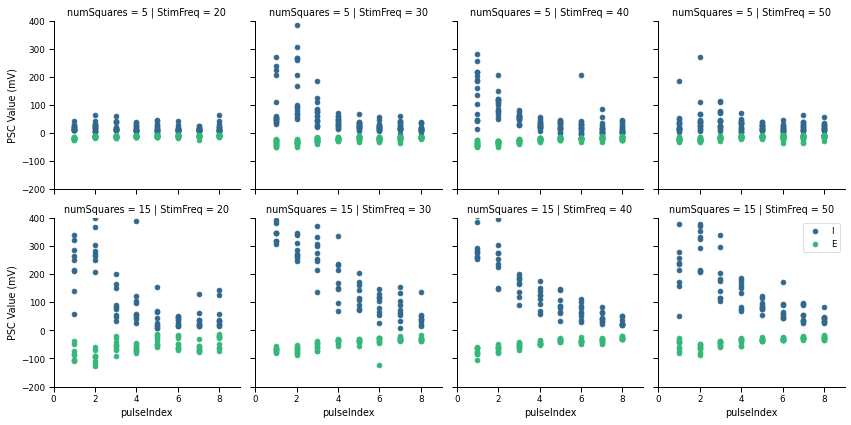

In [97]:
# Plots
plt.figure()
plotMaker(cellFile,ploty="peakRes",plotby="EI")